# **write a VAE:**

1.  much like the one in the tutorial with an encoder(left) and decoder(right) - basic vanilla VAE implementation

data pre-processing

In [1]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

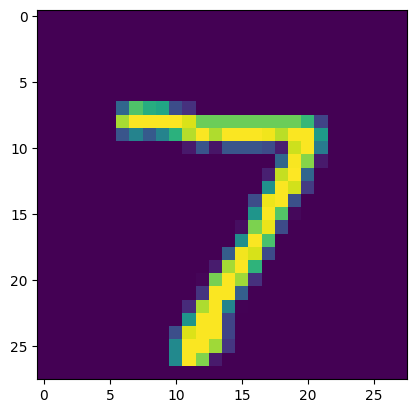

In [3]:
plt.imshow(X_test[0])

In [4]:
#converting into vector
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
X_train.shape

(60000, 784)

In [5]:
#rescale
X_train = X_train/255
X_test = X_test/255
X_train.max()

1.0

model

In [6]:
input_layer = Input(shape = (X_train.shape[1],))
bottleneck = Dense(32, activation = 'relu', name = 'bottleneck')(input_layer)
output_layer= Dense(X_train.shape[1], activation = 'sigmoid', name = 'output')(bottleneck)

In [7]:
autoencoder = Model(input_layer, output_layer)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck (Dense)                   │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
encoder_layer= Input(shape =(32,), name='encoded_layer')
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoder_layer, decoder_layer(encoder_layer))
decoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoded_layer (InputLayer)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,872 (101.06 KB)

 Trainable params: 25,872 (101.06 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
encoder= Model(input_layer, bottleneck)
encoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck (Dense)                   │ (None, 32)                  │          25,120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
encoded_layer=Input(shape=(32,), name='encoded_layer')
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoded_layer, decoder_layer(encoded_layer))
decoder.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoded_layer (InputLayer)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,872 (101.06 KB)

 Trainable params: 25,872 (101.06 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
autoencoder.compile(loss='mse', optimizer='adam')
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0844
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0282
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0195
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0152
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0128
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0116
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0110
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0107
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0105
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0104
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0103
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0103
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0103
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0102
Epoch 15/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

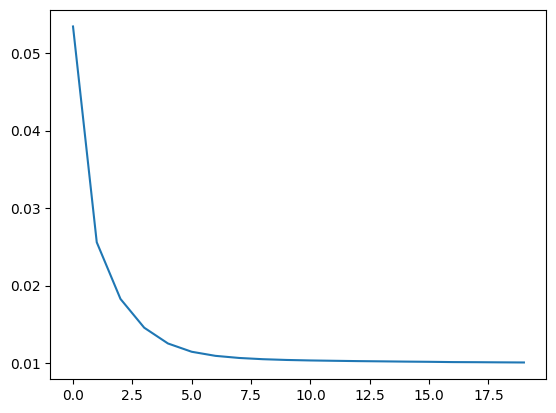

In [12]:
plt.plot(history.history['loss'])

In [13]:
encoded_data = encoder.predict(X_test, batch_size=512)
encoded_data.shape

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(10000, 32)

In [14]:
output_data=decoder.predict(encoded_data, batch_size=512)
output_data.shape

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(10000, 784)

In [15]:
reshaped_output_data = output_data.reshape(output_data.shape[0], 28, 28)
reshaped_output_data.shape

(10000, 28, 28)

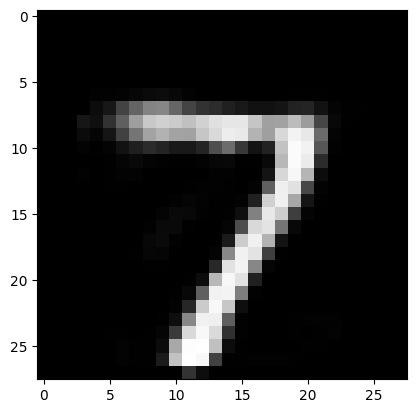

In [16]:
plt.imshow(reshaped_output_data[0], cmap='gray')

In [17]:
X_test=X_test.reshape(10000, 28, 28)
X_test.shape

(10000, 28, 28)

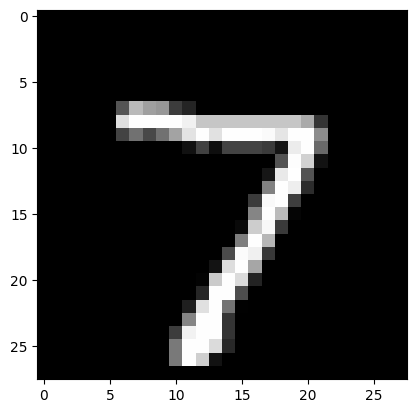

In [18]:
plt.imshow(X_test[0], cmap='gray')

In [19]:
from sklearn.metrics import mean_squared_error

# Reshape X_test to match output_data's shape
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Calculate MSE
mse = mean_squared_error(X_test_flat, output_data)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.009744472519418373
